test loi uniforme : 4
test loi de Bernoulli : 0
test loi binomiale : 5
test loi géométrique : 4


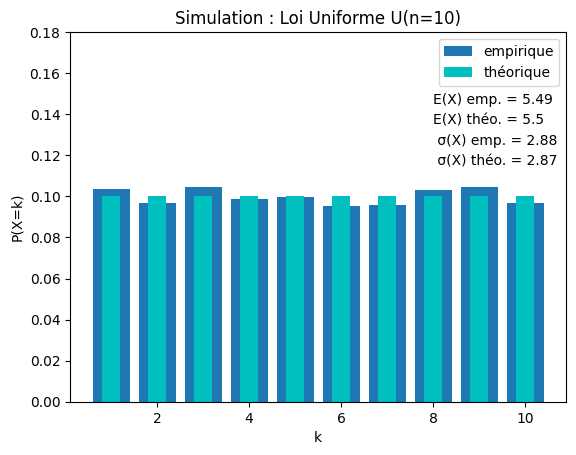

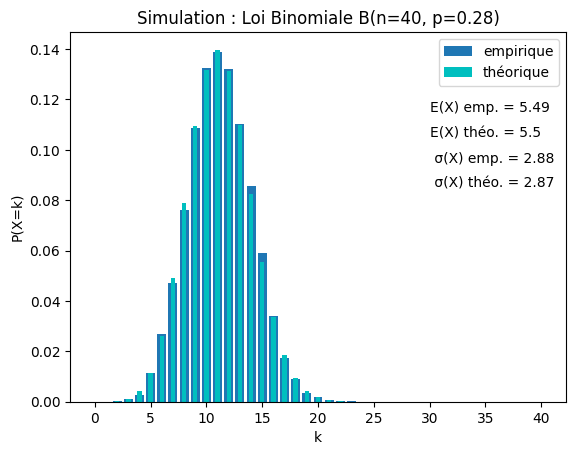

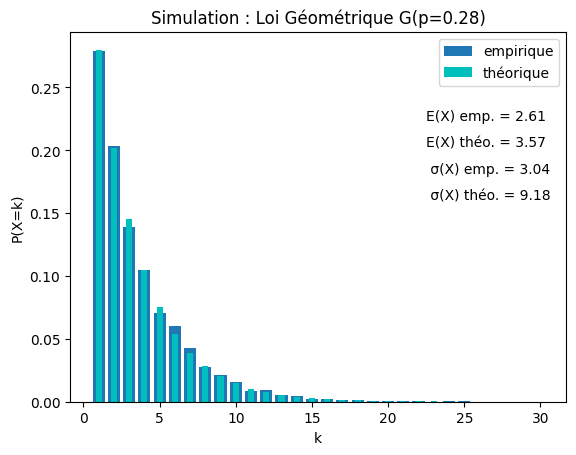

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import math

def LoiUniforme(n): #def de la loi uniforme
    return np.random.randint(1,n+1)

print("test loi uniforme : " + str(LoiUniforme(5))) #test de la loi uniforme


def LoiBernoulli(p): #def de la loi de Bernoulli
    nb = np.random.random()
    if nb < p : #test de conditon
        return 1
    else :
        return 0
    
print("test loi de Bernoulli : " + str(LoiBernoulli(0.5))) #test de la loi de Bernoulli


def LoiBinomiale(n,p): #def de la loi binomiale
    cnt = 0
    for i in range(n): #on répète n fois
        if LoiBernoulli(p): #si bernoulli réussi, on incrémente
            cnt+=1
    return cnt

print("test loi binomiale : " + str(LoiBinomiale(10,0.5))) #test de la loi de binomiale


def LoiGéométrique(p): #def de la loi géométrique
    cnt = 0
    while not(LoiBernoulli(p)): #tant qu'on n'a pas le succès souhaité, on compte et on relance
        cnt+=1
    return cnt

print("test loi géométrique : " + str(LoiGéométrique(0.5))) #test de la loi de géométrique


#Test grande échelle des lois ci-dessus
nb_exp = 10000

#Test grande échelle de la loi uniforme
n_uniforme = 10

#Empirique
result_uniforme_empirique = []
for i in range(nb_exp): #on génère nos valeurs
    result_uniforme_empirique.append(LoiUniforme(n_uniforme))


#Théorique
val_uniforme_théorique = []
proba_uniforme_théorique = []
for i in range(n_uniforme): 
    val_uniforme_théorique.append(i+1) #on génère toute les valeurs
    proba_uniforme_théorique.append(nb_exp/(n_uniforme*nb_exp)) #on génère toutes les proba
esp_uniforme_theo = (n_uniforme+1)/2 #on calcule l'espérance théorique
ecart_uniforme_theo = round(np.sqrt((n_uniforme**2-1)/12),2) #on calcule l'écart type théorique


hUniforme, binsUniforme, _ = plt.hist(result_uniforme_empirique,bins=np.arange(1,n_uniforme+2)-0.5,rwidth=0.8,label="empirique",density=True)
plt.bar(val_uniforme_théorique,proba_uniforme_théorique,width=0.4,color='c',label="théorique")
plt.ylabel("P(X=k)")
plt.xlabel("k")
plt.ylim(top=1.8*nb_exp/(n_uniforme*nb_exp))
plt.title("Simulation : Loi Uniforme U(n=" + str(n_uniforme) +")")
plt.legend(loc="upper right")
plt.text(8, 0.145, s = 'E(X) emp. = '+str(round(np.mean(result_uniforme_empirique),2)))    
plt.text(8, 0.135, s = 'E(X) théo. = '+str(esp_uniforme_theo))
plt.text(8, 0.125, s = ' σ(X) emp. = '+str(round(np.std(result_uniforme_empirique),2)))  
plt.text(8, 0.115, s = ' σ(X) théo. = '+str(ecart_uniforme_theo))
plt.show()

#Test grande échelle de la loi binomiale
n_binomiale = 40
p_binomiale = 0.28

#Empirique
result_binomiale_empirique = []
for i in range(nb_exp): #on génère nos valeurs
    result_binomiale_empirique.append(LoiBinomiale(n_binomiale,p_binomiale))


#Théorique
val_binomiale_théorique = []
proba_binomiale_théorique = []
for i in range(n_binomiale+1): #on simule les résultats théorique à l'aide de 2 boucles
    val_binomiale_théorique.append(i)
    proba_binomiale_théorique.append((math.factorial(n_binomiale)/(math.factorial(i)*math.factorial(n_binomiale-i)))*p_binomiale**i*((1-p_binomiale)**(n_binomiale-i)))
esp_uniforme_theo = (n_uniforme+1)/2 #on calcule l'espérance théorique
ecart_uniforme_theo = round(np.sqrt((n_uniforme**2-1)/12),2) #on calcule l'écart type théorique



hBinomiale, binsBinomiale, _ = plt.hist(result_binomiale_empirique,bins=np.arange(1,n_binomiale+1)-0.5,rwidth=0.8,label="empirique",density = True)
plt.bar(val_binomiale_théorique,proba_binomiale_théorique,width=0.4,color='c',label="théorique")
plt.ylabel("P(X=k)")
plt.xlabel("k")
plt.title("Simulation : Loi Binomiale B(n=" + str(n_binomiale) + ", p=" + str(p_binomiale)+")")
plt.legend(loc="upper right")
plt.text(30, 0.115, s = 'E(X) emp. = '+str(round(np.mean(result_uniforme_empirique),2)))    
plt.text(30, 0.105, s = 'E(X) théo. = '+str(esp_uniforme_theo))
plt.text(30, 0.095, s = ' σ(X) emp. = '+str(round(np.std(result_uniforme_empirique),2)))  
plt.text(30, 0.085, s = ' σ(X) théo. = '+str(ecart_uniforme_theo))
plt.show()




#Test grande échelle de la loi géométiruqe
p_géométrique = 0.28
n_affiché = 30

#Empirique
result_géométrique_empirique = []
for i in range(nb_exp): #on génère nos valeurs
    result_géométrique_empirique.append(LoiGéométrique(p_géométrique))


#Théorique
val_géométrique_théorique = []
proba_géométrique_théorique = []
for i in range(1,n_affiché+1): #on simule les résultats théorique à l'aide de 2 boucles
    val_géométrique_théorique.append(i)
    proba_géométrique_théorique.append(p_géométrique*(1-p_géométrique)**(i-1))
esp_géométrique_theo = round(1/p_géométrique,2) #on calcule l'espérance théorique
ecart_géométrique_theo = round(((1-p_géométrique)/p_géométrique**2),2) #on calcule l'écart type théorique


hBinomiale, binsBinomiale, _ = plt.hist(result_géométrique_empirique,bins=np.arange(1,n_affiché)-0.5,rwidth=0.8,label="empirique",density = True)
plt.bar(val_géométrique_théorique,proba_géométrique_théorique,width=0.4,color='c',label="théorique")
plt.ylabel("P(X=k)")
plt.xlabel("k")
plt.title("Simulation : Loi Géométrique G(p=" + str(p_géométrique) + ")")
plt.legend(loc="upper right")
plt.text(0.75*n_affiché, 0.8*p_géométrique, s = 'E(X) emp. = '+str(round(np.mean(result_géométrique_empirique),2)))    
plt.text(0.75*n_affiché, 0.725*p_géométrique, s = 'E(X) théo. = '+str(esp_géométrique_theo))
plt.text(0.75*n_affiché, 0.65*p_géométrique, s = ' σ(X) emp. = '+str(round(np.std(result_géométrique_empirique),2)))  
plt.text(0.75*n_affiché, 0.575*p_géométrique, s = ' σ(X) théo. = '+str(ecart_géométrique_theo))
plt.show()







